# Things to be covered:
0. An end-to-end Scikit-learn Workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm/estimator and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Put it in all together

# 1. Getting the data ready

In [1]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("data/heart_disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Feature Matrix
X = heart_disease.drop("target", axis=1)
# Label Matrix
Y = heart_disease["target"]

# 2. Choose right model and hyperparameters
* HyperParameters are like dials on a model that you can tune to make the model better or worse

In [3]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# the default hyper-parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 3. Fit the model to the training data 

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [6]:
# make a prediction
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [7]:
y_test

138    1
215    0
230    0
256    0
217    0
      ..
32     1
102    1
258    0
185    0
146    1
Name: target, Length: 61, dtype: int64

# 4. Evaluate the model
* how good the predictions are

In [8]:
clf.score(x_train, y_train)

1.0

In [9]:
clf.score(x_test, y_test)

0.8524590163934426

###  Some other ways

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[23,  4],
       [ 5, 29]], dtype=int64)

In [13]:
accuracy_score(y_test, y_preds)

0.8524590163934426

# 5. Improve a Model

In [14]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test sets: {clf.score(x_test, y_test) * 100:.2f}%")

Trying model with 10 estimators...
Model accuracy on test sets: 85.25%
Trying model with 20 estimators...
Model accuracy on test sets: 88.52%
Trying model with 30 estimators...
Model accuracy on test sets: 86.89%
Trying model with 40 estimators...
Model accuracy on test sets: 85.25%
Trying model with 50 estimators...
Model accuracy on test sets: 88.52%
Trying model with 60 estimators...
Model accuracy on test sets: 88.52%
Trying model with 70 estimators...
Model accuracy on test sets: 85.25%
Trying model with 80 estimators...
Model accuracy on test sets: 86.89%
Trying model with 90 estimators...
Model accuracy on test sets: 88.52%


# 6. Save a model and Load it

In [15]:
import pickle

# Saving the model
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [16]:
# Loading the model
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8852459016393442

# Doing these elaborately

# 1. Getting the data ready to be used with machine learning
* Split the data into features and labels
* Filling/ Imputing or disregarding missing values
* Converting non-numerical values to numerical values(also called `Feature Encoding`)

In [17]:
x = heart_disease.drop("target", axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y = heart_disease["target"]

## a) Split the data into features and labels

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## b) Filling/ Imputing or disregarding missing values

In [21]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [22]:
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Build A Machine Learning Model

In [23]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()    #  Creating a Model
# model.fit(x_train, y_train)        # training the model
# model.score(x_test, y_test)        # evaluating the model 
# # shows error because can not operate on strings

### Turn the categories into Number

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_x = transformer.fit_transform(x)
pd.DataFrame(transformed_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [25]:
# Another way to turn string into number
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


### Refit the model as we converted the string data into numbers

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3235867221569877

## b2) In case of Missing Values in the data
``There are two ways for doing this:``
* 1) Imputation : Fill the missing data with some values
* 2) Reove the samples with missing data altogether

In [27]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [28]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

### Option 1(a) : Fill missing data with Pandas

In [30]:
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

In [31]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

#### For the "Price" column, we'll remove the rows with missing values. Because, price is what we will predict.

In [32]:
car_sales_missing.dropna(inplace=True)

In [33]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [34]:
x = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

### Turn the categories into Number

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 1(b) : Fill missing data with Scikit-Learn

In [36]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Drop the rows with no labels

In [37]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

#### Split into x and y

In [38]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill the categorical values with "missing" and "numerical" values with "mean"
# Defining variuos imputers
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer that fills missing data
imputer = ColumnTransformer([
                             ("cat_imputer", cat_imputer, cat_features),
                             ("door_imputer", door_imputer, door_features),
                             ("num_imputer", num_imputer, num_features)
                            ])

# Transform Data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [40]:
# Creating a new DataFrame
car_sales_filled = pd.DataFrame(filled_x,
                                columns=["Make", "Colour", "Odometer (KM)", "Doors"])
car_sales_filled

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [41]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

#### Turn the string data into numerical data

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x913 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

#####  Now we've got our data as  numbers and filled (no missing values)
##### Let's fit our data to a model

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

-0.044955128011236356

# 2. Choosing the right estimator/algorithm for our problems

* For Structured Data(table or DF) - Use *`"Ensemble"`* methods
* For Unstructured Data(images/audio/text) - Use *`"Deep Learning"`* or *`"Transfer Learning"`* methods


## 2.1 : Picking a Machine Learning Model for *`"Regression"`* problem 

###  Import sklearn builtin Boston Housing data set

In [44]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### Turning it into a DataFrame

In [45]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [46]:
len(boston_df)

506

### a) we'll use `"Ridge Regression"` model, as concluded from the map

In [47]:
from sklearn.linear_model import Ridge
np.random.seed(42)
x = boston_df.drop("target", axis=1)
y = boston_df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
model = Ridge()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6662221670168522

### b) Let's use `"Random Forest Regressor"` model

In [48]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x = boston_df.drop("target", axis=1)
y = boston_df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20)
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)
model_rf.score(x_test, y_test)

0.8654448653350507

## 2.2 : Picking a Machine Learning Model for *`"Classification"`* problem 

In [49]:
heart_disease = pd.read_csv("data/heart_disease.csv")

### a) Using `"LinearSVC"` model, as concluded from the map

In [50]:
from sklearn.svm import LinearSVC
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model_clf = LinearSVC()
model_clf.fit(x_train, y_train)
model_clf.score(x_test, y_test)

C:\Users\DIP\AnacondaProjects\project1\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

 ### b) Using `"RandomForestClassifier"` model, as concluded from the map

In [51]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model_clf2 = RandomForestClassifier()
model_clf2.fit(x_train, y_train)
model_clf2.score(x_test, y_test)

0.8524590163934426

# 3. Fit the model on our data and use it to make predictions on our data

## 3.1: Fitting the model on our data

In [52]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model_clf2 = RandomForestClassifier()
model_clf2.fit(x_train, y_train)
model_clf2.score(x_test, y_test)

0.8524590163934426

## 3.2: Make Predictions on a Classification Model
### Two ways to make predictions:
* Using *`"predict()"`* function
* Using *`"predict_proba()"`* function

### 3.2(a): Making predictions with the predict() function

In [53]:
 model_clf2.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [54]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Compare predictions to truth labels to evaluate the model

In [55]:
y_preds = model_clf2.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### 3.2(b): Making predictions with the predict_proba() function
* *`predict_proba()`* returns probabilites of a classification label
* in this case the classification labels are *`"Not Heart Disease"`* and *`"Heart Disease"`*

In [57]:
model_clf2.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

## 3.3: Make Predictions on a Regresssion Model

In [58]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

model_rf2 = RandomForestRegressor().fit(x_train, y_train)

y_preds_rf2 = model_rf2.predict(x_test)

### Compare the predictions to the truth
* Using *`"Mean Absolute Error"`*

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds_rf2)

2.136382352941176

# 4. Evaluating a Machine Learning model

### There are three different APIs for evalutaing the quality of a model's predictions:
* *` 1. Estimator Score Method`*
* *` 2. Scoring Parameter`*
* *` 3. Metric Functions`*

## 4.1: Evaluating a model with the *`"Score"`* method

### 4.1(a): Classification Model

In [60]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [61]:
clf.score(x_train, y_train)

1.0

In [62]:
clf.score(x_test, y_test)

0.8524590163934426

### 4.1(b): Regression Model

In [63]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

model = RandomForestRegressor().fit(x_train, y_train)

In [64]:
model.score(x_test, y_test)

0.8654448653350507

## 4.2: Evaluating the model using *`"Scoring Parameter"`* method
### It uses *`cross-validation technique`*
* The *`"cross_val_score()"`* uses *`K-fold Cross-validation`*

### 4.2(a): Classification Model

In [65]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8524590163934426

In [66]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [67]:
np.random.seed(42)

clf_single_score = clf.score(x_test, y_test)

# Take the mean of the 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

## ***`4.2.1: Classification model evaluation metrics`***
* *`1. Accuracy`*
* *`2. Area under ROC(Reciever Operating Characteristic) curve`*
* *`3. Confusion Matrix`*
* *`4. Classification Report`*

## ***`4.2.1(a) : Accuracy`***

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [69]:
np.mean(cross_val_score)

0.8248087431693989

In [70]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100 : .2f}% ")

Heart Disease Classifier Cross-Validated Accuracy:  82.48% 


## ***`4.2.1(b) : Area under ROC(Reciever Operating Characteristic) Curve`*** (also known as `"Area Under Curve(AUC)"` )

* **ROC Curve**: A comparison of a model's *`"True Positive Rate(TPR)"`* versus the model's *`"False Positive Rate(FPR)"`*
* **True Positive** = model predicts 1 when truth is 1
* **False Positive** = model predicts 1 when truth is 0
* **True negative** = model predicts 0 when truth is 0
* **False negative** = model predicts 0 when truth is 1

In [71]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20 )

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [72]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [73]:
# Calculate FPR, TPR, Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

**Plotting ROC Curves**

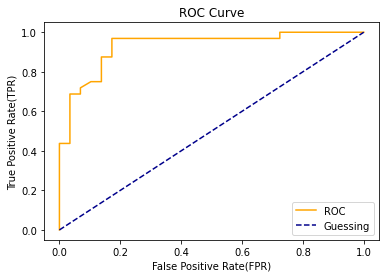

In [74]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label= "ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", label = "Guessing", linestyle="--")
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.legend()
    plt.title("ROC Curve");
plot_roc_curve(fpr, tpr)

**AUC Score**

In [75]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

**Perfect ROC Curve**

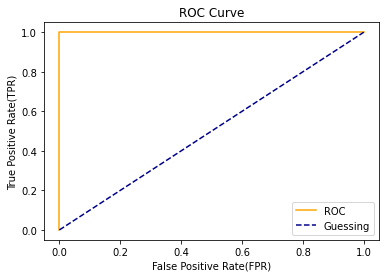

In [76]:
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

**Perfect AUC Score**

In [77]:
roc_auc_score(y_test, y_test)

1.0

## ***`4.2.1(c): Confusion Matrix`***
* **Confusion Matrix:** It is a quick way to compare the labels a model predicts and the labels it was supposed to predict. In assence, it gives you an idea of where the model is getting confused.

In [78]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

   **Visualize Confusion Matrix with *`"pd.crosstab()"`***

In [79]:
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


**Make Confusion Matrix more visible with *`"Seaborn's heatmap()"`***
* Seaborn's heatmap() plots rectangular data as a color-encoded matrix

In [80]:
# # Installing Seaborn module
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

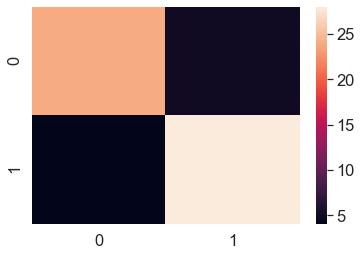

In [81]:
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

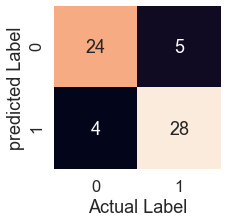

In [82]:
# Defining a function to plot confusion matrix using Seaborn's heatmap() in a better way

def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True,     # Annotates the boxes with conf_mat info
                     cbar = False)
    
    plt.xlabel("Actual Label")
    plt.ylabel("predicted Label");

plot_conf_mat(conf_mat)

## ***`4.2.1(d): Classification Report`***
* Classification Matrix is actually a collection of different evaluation metrics rather than a single one
* It's going to report back a number of different parameters evaluating our classification model

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## `An example when only "accuracy" doesn't work `
### *`There are 10,000 people. One has a disease. You have to build a model to predict who has it.`*

In [84]:
disease_true = np.zeros(10000)    # 10,000 people
disease_true[0] = 1               # Only one positive case

disease_preds = np.zeros(10000)   # a model that predicts every count as zero

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\DIP\AnacondaProjects\project1\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## Summarizing Classification evaluation Metrics:
* **Accuracy** is a good measure to start with if all classes are balanced
* **Precision** and **Recall** become more important when classes are imbalanced.
* -- If False Positive predictions are worse than False Negatives, aim for higher precision
* -- If False Negative predictions are worse than False Positives, aim for higher recall
* **F1 score** is a combination of precision and recall.

## ***`4.2.2: Regression model evaluation metrics`***

* *`1. R^2 (pronounced as r-squared) of Co-efficient of Determination`*
* *`2. Mean Absolute Error(MAE)`*
* *`3. Mean Squared Error(MSE)`*

## ***`4.2.2(a) : R^2`***
* *It compares your model's predictions to the mean of the targets. Values can range from negative infinity(a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers its R^2 value would be 1.*

In [85]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)    # This calculates the R^2 value. It is set as default.

0.8654448653350507

**Another way to calculate the R^2 value**

In [86]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test.mean(), y_test_mean

(21.488235294117644,
 array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
        21.48823529, 21.488235

In [87]:
r2_score(y_test, y_test_mean)

0.0

In [88]:
r2_score(y_test, y_test)

1.0

## ***`4.2.2(b) : Mean Absolute Error(MAE)`***
* *MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your model's predictions are.*

In [89]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)

mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [90]:
 df = pd.DataFrame(data={"actual values":y_test,
                         "predicted values":y_preds})
df["differences"] = df["actual values"]- df["predicted values"]
df

,actual values,predicted values,differences
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,-2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


**Calculate MAE by hand**

In [91]:
abss = np.abs(df["differences"])
abss.mean()

2.136382352941176

## ***`4.2.2(c) : Mean Squared Error(MSE)`***

In [92]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

**Calculate MSE by hand**

In [93]:
sqaured = np.square(df["differences"])
sqaured.mean()

9.867437068627442

### `Which regression evaluation metric should you use?`

* **`1.R^2`** is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* **`2.MAE`** gives a better indication of how far off each of your model's predictions are on average.
* **`3.MSE`** squarES the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
* -- Pay more attention to MAE: When being \$10,000 off is ***twice*** as bad as being \$5,000 off.
* -- Pay more attention to MSE: When being \$10,000 off is ***more than twice*** as bad as being \$5,000 off.

## **4.2.3: Finally using *`Scoring Parameter`***

## ***`4.2.3(a) : For Classification Models`***

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y)

clf = RandomForestClassifier()

In [95]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [96]:
# Cross-validated acccuracy
print(f"The Cross-validated accuracy is: {np.mean(cv_acc) * 100 :.2f}%")

The Cross-validated accuracy is: 82.48%


In [97]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
print(f"The Cross-validated accuracy is: {np.mean(cv_acc) * 100 :.2f}%")

The Cross-validated accuracy is: 82.48%


**Precison**

In [98]:
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, scoring="precision")
np.mean(cv_precision)

0.8329547346025924

**Recall**

In [99]:
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, scoring="recall")
np.mean(cv_recall)

0.8545454545454545

**F1 score**

In [100]:
np.random.seed(42)
cv_f1_score = cross_val_score(clf, x, y, scoring="f1")
np.mean(cv_f1_score)

0.8426854603423346

## ***`4.2.3(b) : For Regression Models`***

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.20)

model = RandomForestRegressor()

**Default(R^2)**

In [102]:
np.random.seed(42)
cv_score = cross_val_score(model, x, y, scoring=None)
np.mean(cv_score)

0.6243870737930857

**R^2**

In [103]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

**Mean Absolute Error**

In [104]:
np.random.seed(42)
cv_mae = cross_val_score(model, x, y, scoring="neg_mean_absolute_error")
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

**Mean Squared Error**

In [105]:
np.random.seed(42)
cv_mse = cross_val_score(model, x, y, scoring="neg_mean_squared_error")
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

## 4.3: Evaluating a model with the *`"Metric Functions"`* as Scikit-Learn Functions

## ***`4.3.1: Classification model evaluation metrics`***

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)

**Classifiers metrics on the test set**

In [107]:
print(f"Accuracy:{accuracy_score(y_test, y_preds) * 100 : .2f}%")
print(f"Precision: {precision_score(y_test, y_preds) * 100 :.2f}%")
print(f"Recall:{recall_score(y_test, y_preds) * 100 : .2f}%")
print(f"F1 Score:{f1_score(y_test, y_preds) * 100 : .2f}%")

Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1 Score: 86.15%


## ***`4.3.2: Regression model evaluation metrics`***

In [108]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

model = RandomForestRegressor()
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

**Regressor Metrics on the test set**

In [109]:
print(f"R^2:{r2_score(y_test, y_preds):.2f}")
print(f"MAE:{mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE:{mean_squared_error(y_test, y_preds):.2f}")

R^2:0.87
MAE:2.14
MSE:9.87


# 5. Improving a Model
* **First Predictions are called `"Baseline Predictions".`**
* **First model is called `"Baseline Model".`**

### Then improve Baseline Predictions and Baseline Models. This can be done in two ways:
* **1) From a *`Data Perspective`*:**
    * a) Collect more data --> more samples
    * b) Improve Data --> more information about each sample
* **2) From a *`Model Perspective`*:**
    * a) Whether there's a better model that can be used --> finding a better model according to the map
    * b) Improve the current model --> by improving the hyper parameters

### More info:
   * **`Parameters:`** The patterns that a model finds in data
   * **`Hyper Parameters:`** Settings on a model which you can adjust to improve model's ability to find patterns

### Three ways to adjust Hyper Parameters:
* **1) By Hand**
* **2) Randomly with RandomizedSearchCV**
* **3) Exhaustively with GridSearchCV**

**How to find the hyper parameters**

In [110]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## ***`The "Hyper Parameters" we are going to adjust:`***
* 1. max_depth
* 2. max_features
* 3. min_samples_leaf
* 4. min_samples_split
* 5. n-estiators

## 5.1: Tuning Hyper Parameters ***`"By Hand"`***

## ***`5.1(a): For Classification Models`***

**A function to compare the actual values with the predicted values**

In [111]:
def evaluate_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)
                  }
    print(f"Accuracy: {accuracy * 100 :.2f}%")
    print(f"Precision: {precision: .2f}")
    print(f"Recall: {recall : .2f}")
    print(f"F1_Score: {f1: .2f}")
    
    return metric_dict

In [112]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into Train, Validation, Test splits
train_split = round(0.7 * len(heart_disease_shuffled))      # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split : valid_split], y[train_split : valid_split]

x_test, y_test = x[valid_split:], y[valid_split:]
                                    
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Baseline Predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation split
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision:  0.81
Recall:  0.88
F1_Score:  0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

**Create a second Classifier with different hyper parameters**

In [113]:
np.random.seed(42)
clf2 = RandomForestClassifier(n_estimators=100, max_depth=200)
clf2.fit(x_train, y_train)
y_preds2 = clf2.predict(x_valid)
baseline_metrics2 = evaluate_preds(y_valid, y_preds2)
baseline_metrics2

Accuracy: 82.22%
Precision:  0.84
Recall:  0.84
F1_Score:  0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

## 5.2: Tuning Hyper Parameters using ***`"RandomizedSearchCV"`***

## ***`5.2(a): For Classification Models`***

In [114]:
from sklearn.model_selection import RandomizedSearchCV

# Dictionary of Hyper Parameters we want to adjust
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]
       }

np.random.seed(42)

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)
rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.9s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   33.7s finished


In [115]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [116]:
rs_y_preds = rs_clf.predict(x_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision:  0.77
Recall:  0.86
F1_Score:  0.81


## 5.3: Tuning Hyper Parameters using ***`"GridSearchCV"`***

***The GridSearchCV does not have any "n_iter" parameter. So it will loop through all the possible combination of the parameter values. This requires highly configurated computers. So we should reduce the search space, by decreasing the number of parameter values***

In [117]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

#### Creating another grid with reduced number of hyper parameters.
#### Using the `".best_params_"` values.

In [118]:
grid2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [119]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

clf = RandomForestClassifier(n_jobs=-1)

# Setup GriddSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid2,
                      cv=5,
                      verbose=2)

gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_sam

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   27.7s finished


In [120]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [134]:
gs_y_preds = gs_clf.predict(x_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 81.58%
Precision:  0.78
Recall:  0.83
F1_Score:  0.81


### Let's compare different model's metrics

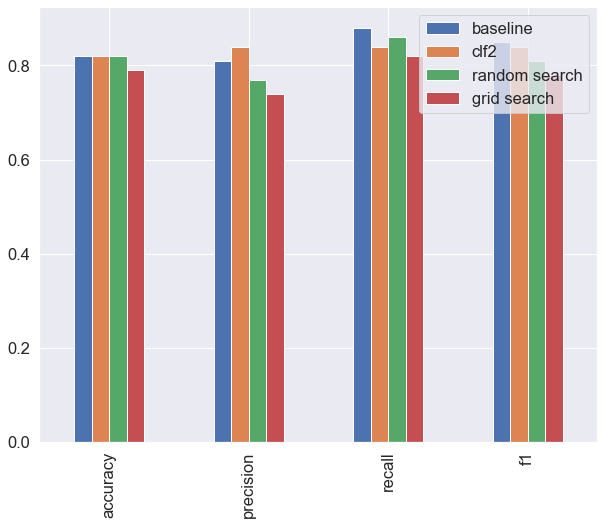

In [122]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf2": baseline_metrics2,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

# 6. Saving and Loading trained Machine Learning models.

## *`Two ways`* to save and load machine learning models:
* **1. With Python's *`pickle`* module**
* **2. With the *`joblib`* module**

## 6.1: *`Pickle`* Module

In [129]:
import pickle

# Save an existing model to a file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [131]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [135]:
# Make Some Predictions
np.random.seed(42)

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y)

pickle_y_preds = loaded_pickle_model.predict(x_test)

evaluate_preds(y_test, pickle_y_preds);

Accuracy: 81.58%
Precision:  0.78
Recall:  0.83
F1_Score:  0.81


## 6.2: *`Joblib`* Module
## *`Joblib is more efficient in case of large number of data`*

In [136]:
from joblib import dump, load

# Save an existing model to a file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [137]:
# Load a saved model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [140]:
# Make some predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)

evaluate_preds(y_test, joblib_y_preds)

Accuracy: 81.58%
Precision:  0.78
Recall:  0.83
F1_Score:  0.81


{'accuracy': 0.82, 'precision': 0.78, 'recall': 0.83, 'f1': 0.81}

# 7. Putting it all together!!!

## *`7.1: Predicting the Price, all in one cell using "Pipeline"`*

In [144]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

## Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
                                          ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                          ("onehot", OneHotEncoder(handle_unknown="ignore")) 
                                         ])
door_features = ["Doors"]
door_transformer = Pipeline(steps=[  ("imputer", SimpleImputer(strategy="constant", fill_value=4))  ])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[ ("imputer", SimpleImputer(strategy="mean"))  ])

# Setup the pre-processing steps (Fill missing values and then convert to numbers)
preprocessor = ColumnTransformer( transformers=[
                                                   ("cat", categorical_transformer, cat_features),
                                                   ("door", door_transformer, door_features),
                                                   ("num", numeric_transformer, numeric_features)
                                                ])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())
                       ])

# Split Data
x = data.drop("Price", axis=1)
y = data["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

# Fit and Score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

## *`7.2: Improving the prediction by Hyper Parameter Tuning using "Pipeline"`*

In [147]:
# Use GridSearchCV with our Regression Pipeline
pipe_grid = {
                "preprocessor__num__imputer__strategy" : ["mean", "median"],
                "model__n_estimators" : [100, 1000],
                "model__max_depth" : [None, 5],
                "model__max_features" : ["auto"],
                "model__min_samples_split" : [2, 4]
            }

gs_model = GridSearchCV(model, pipe_grid, cv=5,  verbose=2)

gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.8s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   3.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [148]:
gs_model.score(x_test, y_test)

0.3339554263158365